In [2]:
from google.cloud import speech
import speech_recognition as sr
import soundfile as sf
import numpy as np
path = "./zara_love.wav"
from google.oauth2 import service_account
import scipy.fft as sci
from scipy import interpolate
from scipy import signal
import matplotlib.pyplot as plt

In [9]:

def get_data():
    with sf.SoundFile(path, 'r+') as f:
        samp_rate = f.samplerate
        data = f.read()
        # print("size of data: ", data.size)
        print(f.frames)
        print("=================================")
        print("data: ", data)
        print("=================================")
        f.close()
        return data


434176
data:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


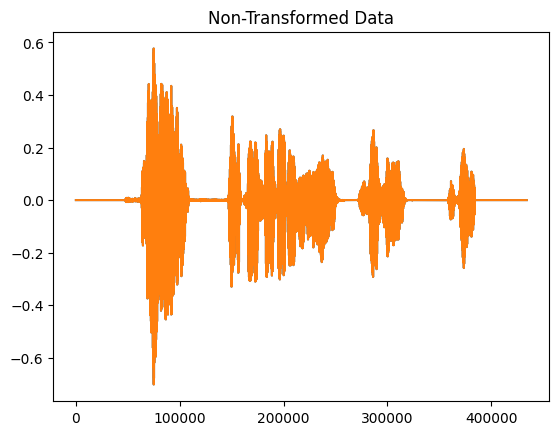

ratio:  48.0
size of data :  868352


c:\Users\nicko\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nicko\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


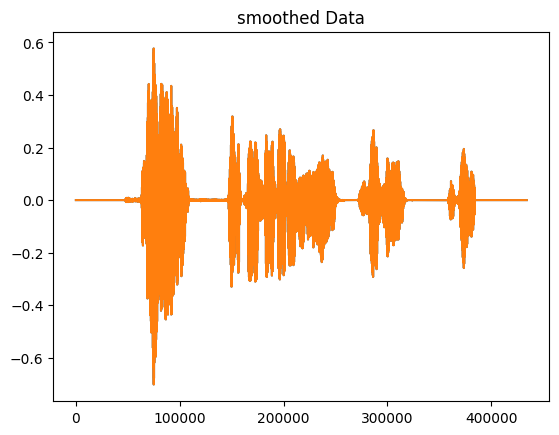

In [16]:
from numpy import mean


with sf.SoundFile(path, 'r+') as f:
    samp_rate = f.samplerate
    data = f.read()
    # print("size of data: ", data.size)
    print(f.frames)
    print("=================================")
    print("data: ", data)
    print("=================================")
    f.close()

tmp = data
plt.title("Non-Transformed Data")
plt.plot(tmp)
plt.show()

x = 0
baby = 0
true_fpms = samp_rate/1000
print("ratio: ", true_fpms)
print("size of data : ", data.size)
while x < data.size-500:

        # if x != idx:
    SUMS = []
    for i in data[x:x+500]:
        SUMS.append(i[0])

    MEAN = mean(SUMS)

    for i in data[x:x+3]:
        if i[0]>MEAN:
            i=0

    # print("data cleaned: ", data[x:idx])
    # print("time of frame: ", time)
    x = x+500
    # checks if frame is not part of the segments containing words, greater than the current segment
    # then it increments the segment if true

plt.title("smoothed Data")
plt.plot(data)
plt.show()


# with sf.SoundFile(path, 'r+') as f:
#     f.write(data)
#     f.close()


434176
data:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
0.5770263671875
(1027.4193174031225+87.25410310641921j)


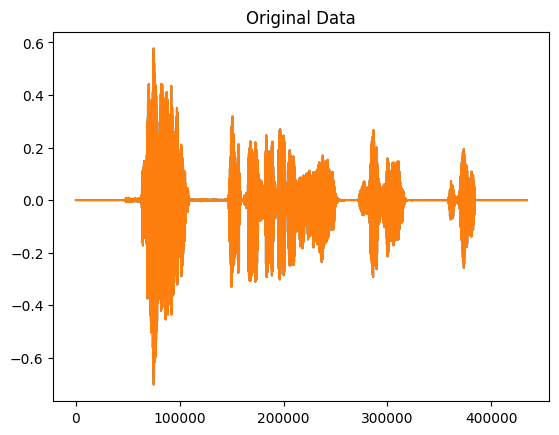

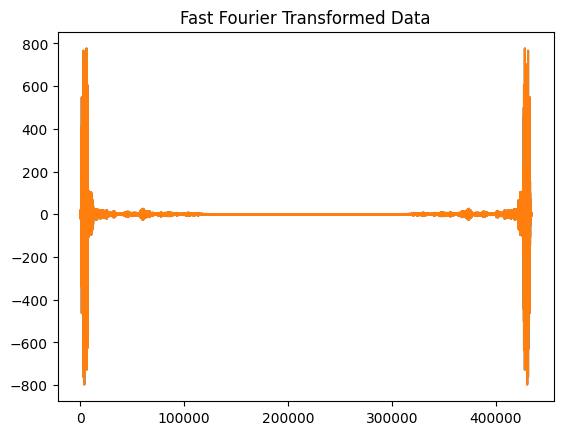

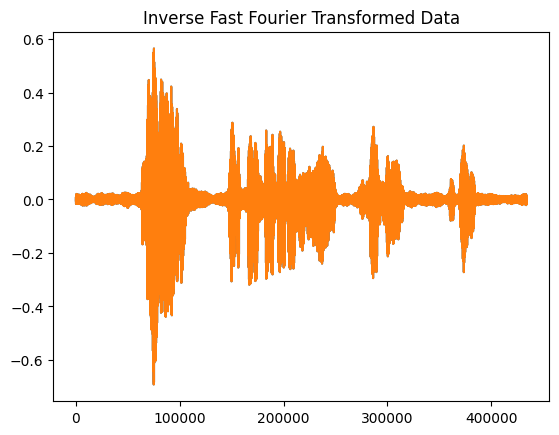

In [18]:
frames_data = get_data()
path1 = "./zara_love_2.wav"



#seperate channels for the audio so the fft can work
channel_1= []
channel_2 = []

for i in frames_data:
    channel_1.append(i[0])
    channel_2.append(i[1])

print(max(channel_1))

channels_og = list(zip(channel_1, channel_2))
# sci.dct
# sci.dst

fourier_trans_s = sci.dst(channel_1, type=2, norm="ortho")
fourier_trans_s2 = sci.dst(channel_2, type=2, norm="ortho")




# for i in range(len(frames_data)):
#     frames_data[i]/=fourier_trans_s[i]


# with sf.SoundFile(path1, 'r+') as f:
#     f.write(frames_data)
#     f.close()

# fourier_trans_sf = sci.rfft(channel_1, norm="forward")
# fourier_trans_sf2 = sci.rfft(channel_2, norm="forward")


# fourier_trans_c = sci.idct(channel_1, type=2)
# fourier_trans_c2 = sci.idct(channel_2, type=2)


fourier_trans_f = sci.fft(channel_1)
fourier_trans_f2 = sci.fft(channel_2)

print(max(fourier_trans_f))

for i in range(len(fourier_trans_f)):
    if fourier_trans_f[i] > 800 or fourier_trans_f[i]<-800:
        fourier_trans_f[i]=0
        fourier_trans_f2[i]=0


fourier_trans_if = sci.ifft(fourier_trans_f)
fourier_trans_if2 = sci.ifft(fourier_trans_f2)




# welch1 = signal.welch(channel_1)

# invSTF = signal.istft(frames_data)

# nout = 100000
# w = np.linspace(0.01, 10, nout)
# x_lomb = []
# for x in range(len(channel_1)):
#     x_lomb.append(x)

# lomb = signal.lombscargle(channel_2, channel_1, w)
# print(lomb)

# channels_s = list(zip(fourier_trans_s, fourier_trans_s2))
# channels_sf = list(zip(fourier_trans_sf, fourier_trans_sf2))


# channels_c = list(zip(fourier_trans_c, fourier_trans_c2))

channels_f = list(zip(fourier_trans_f, fourier_trans_f2))

channels_if = list(zip(fourier_trans_if, fourier_trans_if2))

# channels_wel = list(zip(welch1, welch2))

# print(welch1)

with sf.SoundFile(path1, 'r+') as f:
    f.write(frames_data)
    f.close()

plt.title("Original Data")
plt.plot(frames_data)
plt.show()

# plt.title("Sine Fourier Transformed Data")
# plt.plot(channels_sf)
# plt.show()
# plt.title("Cosine Fourier Transformed Data")
# plt.plot(channels_c)
# plt.show()

plt.title("Fast Fourier Transformed Data")
plt.plot(channels_f)
plt.show()

plt.title("Inverse Fast Fourier Transformed Data")
plt.plot(channels_if)
plt.show()


# plt.title("Welch Noise filter")
# plt.plot(lomb)
# plt.show()


# plt.title("Inverse short time fourier filter")
# plt.plot(invSTF)
# plt.show()


